# Robair’s Work – Team 4: Insurance Fraud Project

## 1. Feature Engineering
# - Cleaning
# - Encoding
# - Scaling
# - New Features

## 2. Feature Selection
# - Correlation / Importance
# - Dimensionality Reduction

## 3. Model Evaluation
# - Confusion Matrix
# - Precision / Recall / F1
# - ROC AUC / Plots


In [7]:
from google.colab import files
uploaded = files.upload()


Saving fraud_oracle.csv to fraud_oracle.csv


In [8]:
import pandas as pd

df = pd.read_csv('fraud_oracle.csv')
df.head()


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [9]:
# Preview column names
print("🧾 Column Names:\n", df.columns.tolist())

# Preview the first few rows
df.head()


🧾 Column Names:
 ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy']


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [11]:
# Check for missing values
print("\n🔍 Missing Values:")
print(df.isnull().sum())

# Check data types
print("\n📊 Data Types:")
print(df.dtypes)

# Check unique values in the target column (assumed 'fraud_reported' or similar)
print("\n🎯 Target Variable Distribution:")
# Check the class distribution of the correct target column
df['FraudFound_P'].value_counts()



🔍 Missing Values:
Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

📊 Data Types:
Month                   object
WeekOfMonth              int64
DayOfWeek               object
Ma

,count
FraudFound_P,
0,14497
1,923


In [12]:
# Drop potential ID or constant columns
df.drop(columns=['PolicyNumber', 'RepNumber', 'Year'], inplace=True)


In [13]:
# Get object columns (categorical)
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols


['Month',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'BasePolicy']

In [16]:
# Re-import if necessary
import pandas as pd

# Reload original dataset if needed
# df = pd.read_csv('fraud_oracle.csv')  # Uncomment if you restarted runtime

# Identify categorical columns again
cat_cols = df.select_dtypes(include='object').columns.tolist()

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Confirm success
print("✅ df_encoded shape:", df_encoded.shape)
df_encoded.head()


✅ df_encoded shape: (15420, 122)


,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,Deductible,DriverRating,Month_Aug,Month_Dec,Month_Feb,Month_Jan,...,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_Collision,BasePolicy_Liability
0,5,1,21,0,300,1,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
1,3,4,34,0,400,4,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
2,5,2,47,0,400,3,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,2,1,65,0,400,2,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,5,2,27,0,400,1,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False


Top 15 features positively correlated with FraudFound_P:

AddressChange_Claim_2 to 3 years      0.067467
PolicyType_Sport - Collision          0.050010
PastNumberOfClaims_none               0.047680
AddressChange_Claim_under 6 months    0.046863
VehiclePrice_more than 69000          0.046806
BasePolicy_Collision                  0.043860
VehiclePrice_less than 20000          0.039787
PolicyType_Utility - All Perils       0.038441
VehicleCategory_Utility               0.035815
AgeOfPolicyHolder_21 to 25            0.031258
Sex_Male                              0.029953
PolicyType_Sedan - Collision          0.028302
NumberOfSuppliments_none              0.027541
Days_Policy_Accident_none             0.026174
MonthClaimed_Aug                      0.025849
Name: FraudFound_P, dtype: float64


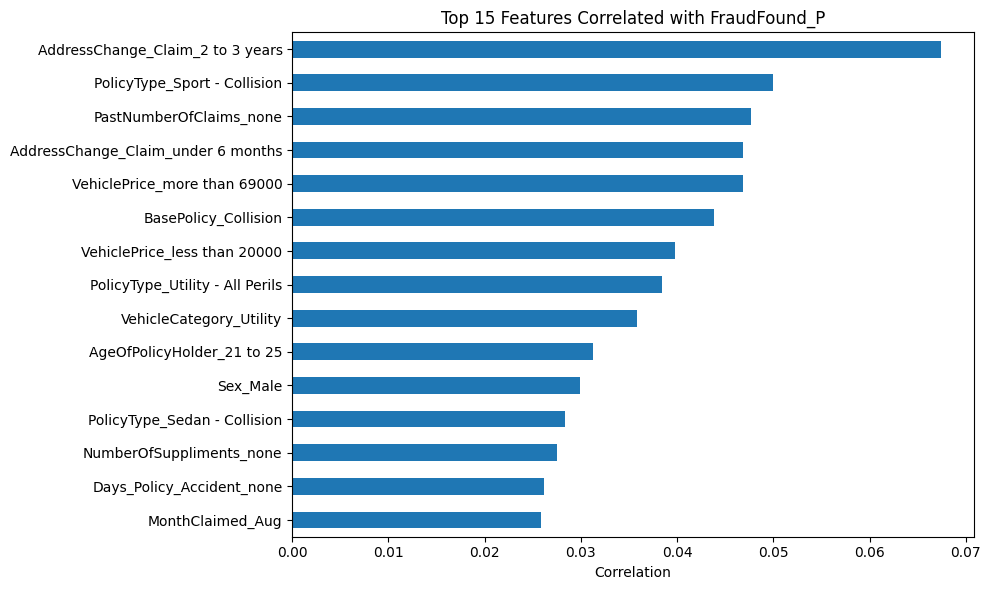

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation with target
corr_with_target = df_encoded.corr()['FraudFound_P'].sort_values(ascending=False)

# Display top 15 positively correlated features
print("Top 15 features positively correlated with FraudFound_P:\n")
print(corr_with_target[1:16])  # Skip index 0 which is the target itself

# Plot correlation
plt.figure(figsize=(10, 6))
corr_with_target[1:16].plot(kind='barh')
plt.title('Top 15 Features Correlated with FraudFound_P')
plt.xlabel('Correlation')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


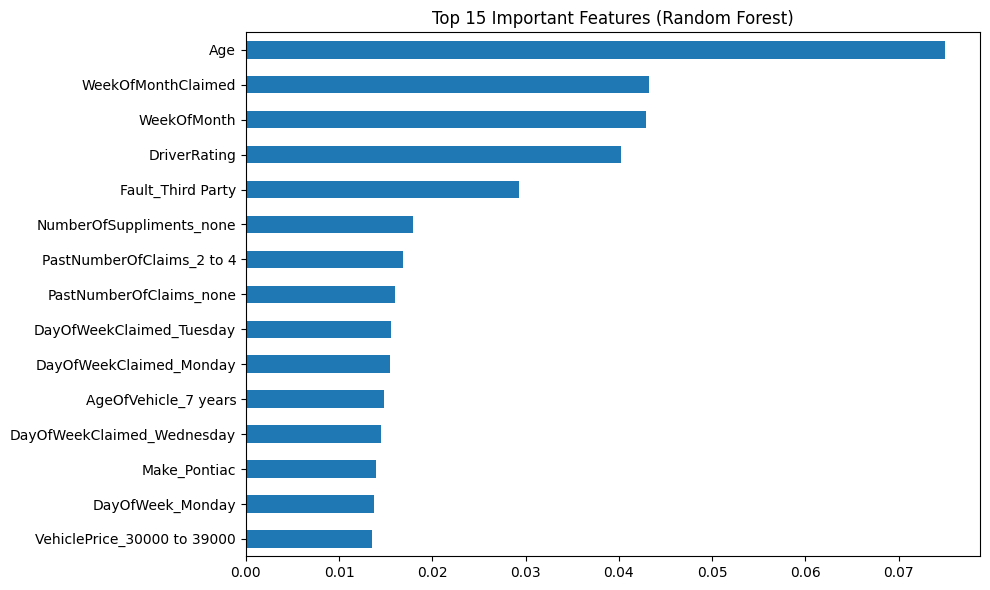

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define features and target
X = df_encoded.drop('FraudFound_P', axis=1)
y = df_encoded['FraudFound_P']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

# Plot top 15 features
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title('Top 15 Important Features (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [19]:
# Select top features (customize count as needed)
selected_features = top_features.index.tolist()

# Create new DataFrame with selected features
X_selected = df_encoded[selected_features]
print("✅ Final feature set shape:", X_selected.shape)


✅ Final feature set shape: (15420, 15)


In [20]:
from sklearn.model_selection import train_test_split

# Use selected features and target
X = X_selected
y = df_encoded['FraudFound_P']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


🔍 Logistic Regression Evaluation:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4341
           1       0.00      0.00      0.00       285

    accuracy                           0.94      4626
   macro avg       0.47      0.50      0.48      4626
weighted avg       0.88      0.94      0.91      4626



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


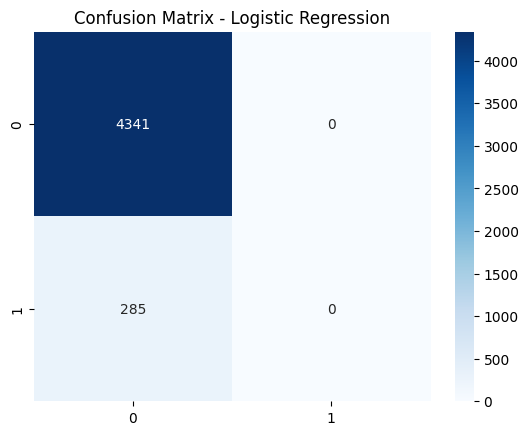

🔍 Random Forest Evaluation:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4341
           1       0.05      0.00      0.01       285

    accuracy                           0.93      4626
   macro avg       0.49      0.50      0.49      4626
weighted avg       0.88      0.93      0.91      4626



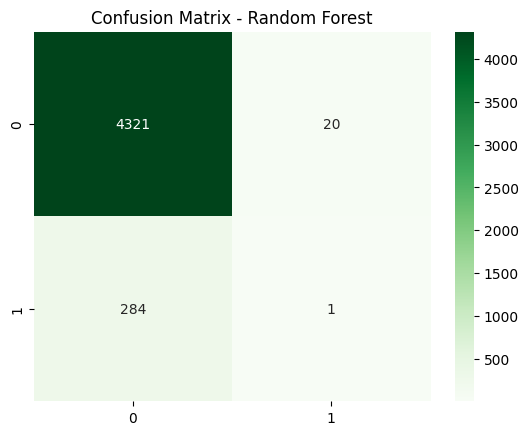

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic Regression Evaluation
print("🔍 Logistic Regression Evaluation:\n")
print(classification_report(y_test, y_pred_lr))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Random Forest Evaluation
print("🔍 Random Forest Evaluation:\n")
print(classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()


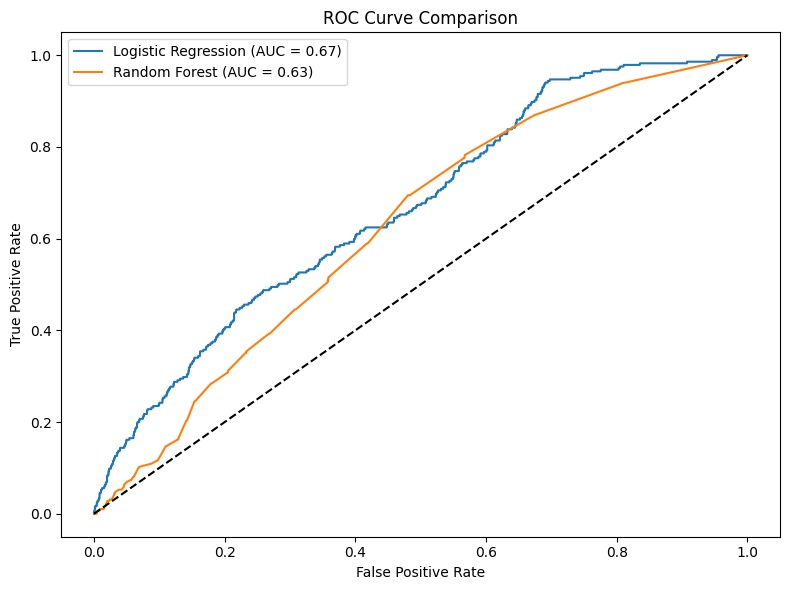

In [23]:
# Predict probabilities for ROC
y_prob_lr = lr.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_lr)))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_rf)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.tight_layout()
plt.show()
